#Effect of noise in function distance

Experiment:
1. Define noise intensity as scalar applied to uniform random noise vector
2. Using sufficiently large sample size, estimate function distance between original network and network with weight noise.
3. Plot as function of intensity of noise

##Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random
N=10 #input dimension

## Expected function distance for random neural networks

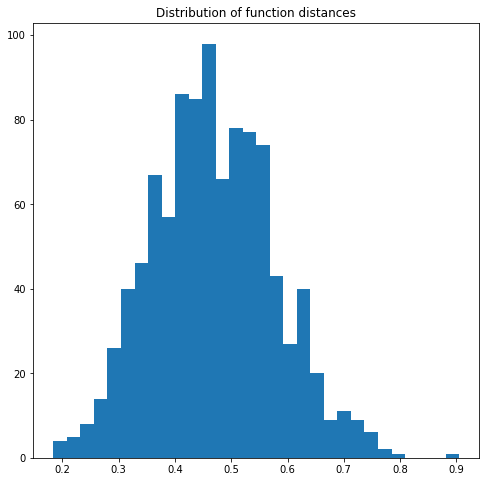

In [3]:
data = []

for TRIAL in range(1000):

  nn1 = tf.keras.Sequential([    
    tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),      
    tf.keras.layers.Dense(1, activation='tanh')
  ])

  nn2 = tf.keras.Sequential([    
    tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),      
    tf.keras.layers.Dense(1, activation='tanh')
  ])

  # compute f_distance
  fd = 0.
  for _ in range(10):
    inpt = tf.random.uniform(shape=(1000,N),minval=-1.,maxval=1.)
    fd += tf.math.reduce_mean(tf.abs(nn1(inpt)-nn2(inpt))).numpy()
  fd = fd/10.
  data.append(fd)



fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Distribution of function distances')
ax1.hist(data,bins=30)
plt.show()




### Expected "function" distance for uniform random vectors

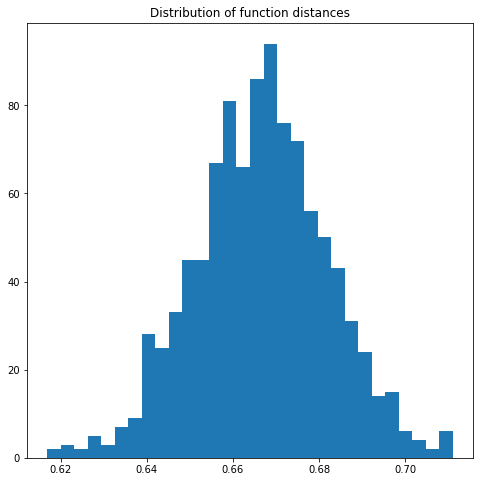

In [2]:
data = []

for TRIAL in range(1000):

  v1 = tf.random.uniform(shape=(1000,1),minval=-1.,maxval=1.)
  v2 = tf.random.uniform(shape=(1000,1),minval=-1.,maxval=1.)
  
    
  # compute f_distance
  fd = tf.math.reduce_mean(tf.abs(v1-v2)).numpy()
  data.append(fd)



fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Distribution of function distances')
ax1.hist(data,bins=30)
plt.show()

##Main experiment

In [ ]:
data = {}

for NOISE_INTENSITY in (1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100):

  data[NOISE_INTENSITY] = []

  for TRIAL in range(10):

    # create "original" network
    orig = tf.keras.Sequential([    
      tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh'),
      tf.keras.layers.Dense(16, activation='tanh'),      
      tf.keras.layers.Dense(1, activation='tanh')
    ])

    # create noised network based on original
    noised = tf.keras.Sequential([    
      tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh'),
      tf.keras.layers.Dense(16, activation='tanh'),      
      tf.keras.layers.Dense(1, activation='tanh')
    ])

    
    # copy and noise weights
    for layer_o, layer_n in zip(orig.layers, noised.layers):
      weights = layer_o.get_weights()
      weights_noise = NOISE_INTENSITY * tf.random.uniform(weights[0].shape,-1.,1.)
      biases_noise = NOISE_INTENSITY * tf.random.uniform(weights[1].shape,-1.,1.)
      layer_n.set_weights([weights[0]+weights_noise, weights[1]+biases_noise])


    # compute f_distance
    fd = 0.
    for _ in range(10):
      inpt = tf.random.uniform(shape=(100000,N),minval=-1.,maxval=1.)
      fd += tf.math.reduce_mean(tf.abs(orig(inpt)-noised(inpt))).numpy()
    D_true = fd/10.
    data[NOISE_INTENSITY].append(D_true)


for k,v in data.items():
  print(k,v)
    





0.0001 [0.0001226428197696805, 0.00013065542880212887, 0.00012362972047412767, 0.00016592800529906525, 9.763232010300271e-05, 8.574941894039512e-05, 0.00010732695373008027, 0.00013001488259760662, 0.0001145867892773822, 0.00013358302239794285]
0.001 [0.0012826744816266, 0.0015583137632347644, 0.0008257073757704347, 0.0017300807288847865, 0.0008815642911940813, 0.0006608328782022, 0.0015909424051642417, 0.0010293586528860033, 0.0010947178932838141, 0.0017213757964782417]
0.01 [0.011602269485592842, 0.012412705086171627, 0.01507028704509139, 0.012335388455539942, 0.011611186992377042, 0.013962646201252937, 0.015513132233172655, 0.009791538026183844, 0.013036161940544844, 0.016461532190442087]
0.1 [0.18516926765441893, 0.12655843198299407, 0.09482134655117988, 0.1100421242415905, 0.16305763721466066, 0.12774345874786378, 0.13991475701332093, 0.12244767844676971, 0.10834314078092575, 0.12812724560499192]
1 [0.7634418547153473, 0.8455724596977234, 0.7157146215438843, 0.8060637712478638, 0.7

###Plot result

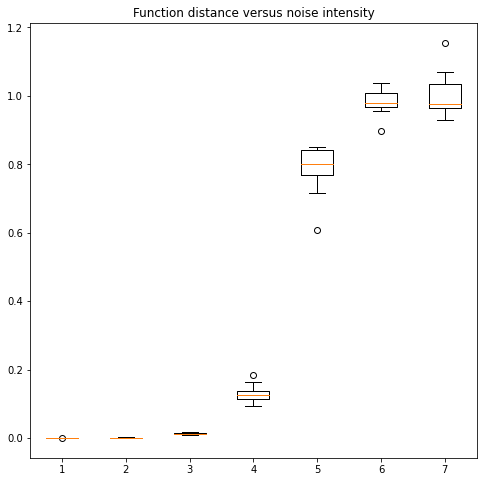

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Function distance versus noise intensity')
ax1.boxplot(data.values())
plt.show()

## Visualize sample outputs


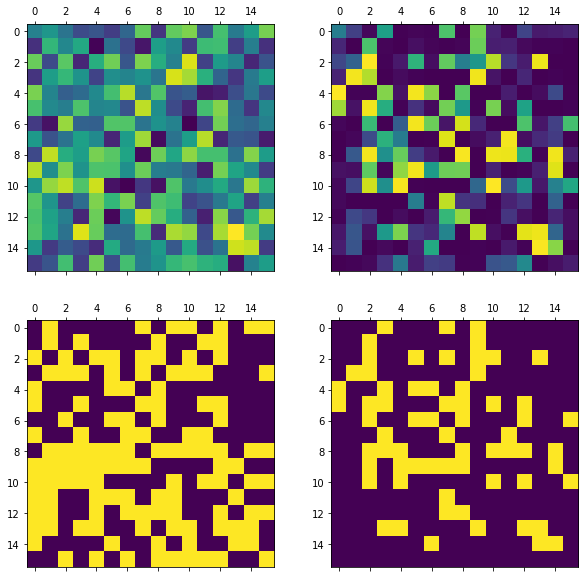

In [ ]:
# create "original" network
orig = tf.keras.Sequential([    
  tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh'),
  tf.keras.layers.Dense(16, activation='tanh'),      
  tf.keras.layers.Dense(1, activation='tanh')
])

# create noised network based on original
noised = tf.keras.Sequential([    
  tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh'),
  tf.keras.layers.Dense(16, activation='tanh'),      
  tf.keras.layers.Dense(1, activation='tanh')
])


NOISE_INTENSITY = 5e-1
# copy and noise weights
for layer_o, layer_n in zip(orig.layers, noised.layers):
  weights = layer_o.get_weights()
  weights_noise = NOISE_INTENSITY * tf.random.uniform(weights[0].shape,-1.,1.)
  biases_noise = NOISE_INTENSITY * tf.random.uniform(weights[1].shape,-1.,1.)
  layer_n.set_weights([weights[0]+weights_noise, weights[1]+biases_noise])  
  # layer_n.set_weights([weights_noise, biases_noise])


SAMPLE_SIZE=16
fig, axes = plt.subplots(2,2,figsize=(10,10))
inpt = tf.random.uniform(shape=(SAMPLE_SIZE*SAMPLE_SIZE,N),minval=-1.,maxval=1.)
axes[0][0].matshow(orig(inpt).numpy().reshape((SAMPLE_SIZE,SAMPLE_SIZE)))
axes[0][1].matshow(noised(inpt).numpy().reshape((SAMPLE_SIZE,SAMPLE_SIZE)))
axes[1][0].matshow(np.sign(orig(inpt).numpy()).reshape((SAMPLE_SIZE,SAMPLE_SIZE)))
axes[1][1].matshow(np.sign(noised(inpt).numpy()).reshape((SAMPLE_SIZE,SAMPLE_SIZE)))

##Conclusions

1. Independently sampled pairs of neural nets seem to have normally distributed function distances.
2. Small neural nets tested here seem to experience threshold phenomenon on a logarithmic plot with weight-noise stability up to a threshold and then loss of stability.
3. Adding noise to the weights can produce two nets with functions with higher f-distance than randomly sampling pairs of nets?
4. Next: f-distance versus weight distance...
